# 1.0 Setup

In [58]:
# Data visualisation and manipulate
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

## For Monte Carlo Simuation
from math import *
from scipy.stats import norm
import random

# Download stock data from Yahoo! Finance stock data
%pip install yfinance
import yfinance as yf

# import pandas_datareader as pdr
from datetime import datetime , timedelta
from dateutil.relativedelta import relativedelta
from copy import copy


# for candlestick plot libraries
%pip install mplfinance
import mplfinance as fplt

# for technical indicators
%pip install ta
from ta import trend, volatility , momentum
import ta

#for plotting portfolio
%pip install plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

#stocks trading simulator
%pip install backtesting
%pip install bokeh==3.2.1

%pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgr

# 2.0 Download stocks data


## 2.1 Timeframe

In [2]:
import datetime

#x = datetime.datetime(2022, 4, 17)
#today =  datetime.today()
#end_date= datetime(today.year, today.month, today.day)
start_date = datetime.datetime(2022, 9, 30)
end_date = start_date + relativedelta(months=12)
total_days = end_date - start_date

print("The starting date is", start_date.strftime("%d/%m/%Y"))
print("The end date is ", end_date.strftime("%d/%m/%Y"))
print("The total days is", total_days.days)

The starting date is 30/09/2022
The end date is  30/09/2023
The total days is 365


## 2.2 Stocks

In [3]:
#Stock data download from Yahoo! Finance

# 1. HSBC
# 2. MTR
# 3. China Mobile
# 4. CLP Holdings
# 5. Hang Seng Bank
# 6. Bank of China

HSBC = {
    'name': 'HSBC',
    'data': yf.download("0005.HK", start_date, end_date)
    }
MTR = {
    'name': 'MTR',
    'data': yf.download("0066.HK", start_date, end_date)
}
CHM = {
    'name': 'China Mobile',
    'data': yf.download("0941.HK", start_date, end_date)
}
CLP = {
    'name': 'CLP Holdings',
    'data': yf.download("0002.HK", start_date, end_date)
}
HSB = {
    'name': 'Hang Seng Bank',
    'data': yf.download("0011.HK", start_date, end_date)
}
BOC = {
    'name': 'Bank of China',
    'data': yf.download("3988.HK", start_date, end_date)
}
CBC = {
    'name': 'China Construction Bank',
    'data': yf.download("0939.HK", start_date, end_date)
}
HSH = {
    'name': 'Haier Smart Home',
    'data': yf.download("6690.HK", start_date, end_date)
}
MET = {
    'name': 'Meituan',
    'data': yf.download("3690.HK", start_date, end_date)
}
XMC = {
    'name': 'Xiaomi Corporation',
    'data': yf.download("1810.HK", start_date, end_date)
}
HSI = {
    'name': 'Hang Seng Index',
    'data': yf.download("^HSI", start_date, end_date)
}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## 2.3 Calculate Technical Indicators (for reference only)



In [291]:
def calculate_technical_indicators(close_price, high, low):
    # Calculate RSI
    rsi = ta.momentum.RSIIndicator(close_price).rsi()

    # Calculate Bollinger Bands
    bollinger_bands = ta.volatility.BollingerBands(close_price)
    upper_band = bollinger_bands.bollinger_hband()
    middle_band = bollinger_bands.bollinger_mavg()
    lower_band = bollinger_bands.bollinger_lband()

    # Calculate MACD
    macd = ta.trend.MACD(close_price).macd()
    macd_signal = ta.trend.MACD(close_price).macd_signal()

    # ADX
    adx = ta.trend.adx(high, low, close_price)

    # Aroon Indicator
    aroon_indicator = ta.trend.AroonIndicator(close_price, low).aroon_indicator()
    
    roc = ta.momentum.ROCIndicator(pd.Series(close_price)).roc()

    # Create a DataFrame to store the calculated indicators

    indicators = pd.DataFrame({
        'RSI': rsi,
        'Upper Bollinger Band': upper_band,
        'Middle Bollinger Band': middle_band,
        'Lower Bollinger Band': lower_band,
        'MACD': macd,
        'MACD Signal': macd_signal,
        'Aroon Indicator': aroon_indicator,
        'ADX': adx,
        'ROC': roc
    })



    return indicators

# Combine all stock data
# all_data = pd.concat([HSBC['Close'], MTR['Close'], CHM['Close'], CLP['Close'], HSB['Close'], BOC['Close']], axis=1)
# all_data.columns = ['HSBC', 'MTR', 'CHM', 'CLP', 'HSB', 'BOC']

STOCKS = [HSBC, MTR, CHM, CLP, HSB, BOC]

for stock in STOCKS:
  stock['TA'] = pd.concat([stock['data'],calculate_technical_indicators(stock['data']['Close'], stock['data']['High'], stock['data']['Low'])])

STOCKS[0]['TA']


,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger Band,Middle Bollinger Band,Lower Bollinger Band,MACD,MACD Signal,Aroon Indicator,ADX,ROC
2022-09-30,40.650002,41.400002,40.650002,41.250000,39.816227,21617792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-03,40.200001,40.950001,39.799999,40.349998,38.947506,27252085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-05,42.950001,43.200001,42.500000,42.650002,41.167564,37615359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-06,42.400002,42.599998,41.900002,42.250000,40.781471,11803426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-07,41.450001,41.700001,41.150002,41.250000,39.816227,12696068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,NaN,NaN,NaN,NaN,NaN,NaN,57.553506,61.985037,59.3150,56.644963,0.176308,-0.246790,36.0,22.428614,5.714284
2023-09-26,NaN,NaN,NaN,NaN,NaN,NaN,52.111953,62.090275,59.4150,56.739725,0.173303,-0.162772,36.0,20.829926,5.410126
2023-09-27,NaN,NaN,NaN,NaN,NaN,NaN,55.265342,62.246976,59.5200,56.793024,0.204870,-0.089243,36.0,19.345429,5.550732
2023-09-28,NaN,NaN,NaN,NaN,NaN,NaN,53.170569,62.348508,59.6250,56.901492,0.207325,-0.029930,36.0,18.150000,4.572904


# 3.0 Stock Trading Simulation

In [92]:
import pandas as pd
import warnings
from openpyxl.workbook import Workbook
warnings.filterwarnings("ignore")

# Define technical indicator formulas

def BollingerBands(values):
    bollinger_bands = ta.volatility.BollingerBands(pd.Series(values))
    upper_band = bollinger_bands.bollinger_hband()
    middle_band = bollinger_bands.bollinger_mavg()
    lower_band = bollinger_bands.bollinger_lband()
    return upper_band, middle_band, lower_band

def SMA(values, n):
    return pd.Series(values).rolling(n).mean()

def RSI(values):
    return ta.momentum.RSIIndicator(pd.Series(values)).rsi()

def MACD(values):
    macd = ta.trend.MACD(pd.Series(values))
    return macd.macd(), macd.macd_signal()

def MACD_Value(values):
  return ta.trend.MACD(pd.Series(values)).macd()

def MACD_Signal(values):
  return ta.trend.MACD(pd.Series(values)).macd_signal()

def GET_HSI(values):
  return HSI['data']

def ADX(high, low, close):
  return ta.trend.adx(pd.Series(high), pd.Series(low), pd.Series(close))

def Aroon_Indicator(close, low):
  return ta.trend.AroonIndicator(pd.Series(close), pd.Series(low)).aroon_indicator()

def Stochastic_Oscillator(high, low, close):
  return ta.momentum.stoch_signal(pd.Series(high), pd.Series(low), pd.Series(close))

def EMA(close, n):
   return ta.trend.EMAIndicator(pd.Series(close), n).ema_indicator() 

def ROC(close):
  return ta.momentum.ROCIndicator(pd.Series(close)).roc()

from backtesting import Backtest, Strategy
from backtesting.lib import crossover

STOCKS = [HSBC, CHM, CLP, CBC, HSH, XMC]

# Formula for computing result with given strategy
def RunSimulation(TradingStrategy, plot = {}, plotAll = False, optimisation = False):
  stockNames = []
  returns = []
  trades = []
  equityFinal = []
  equityData = []
  tradeData = []
  statsData=[]
  for stock in STOCKS:
    bt = Backtest(stock["data"], TradingStrategy, cash=100_000_0/len(STOCKS), commission=0, trade_on_close=True)
    stats = bt.run()

    if plotAll:
      bt.plot(filename=stock['name'])
    else:
      if stock['name'] in plot:
        bt.plot(filename=stock['name'])

    stockNames.append(stock['name'])
    returns.append(stats['Return [%]'])
    trades.append(stats["_trades"].size)
    equityFinal.append(stats['Equity Final [$]'])
    equityData.append(stats['_equity_curve'])
    tradeDF = stats['_trades']
    tradeData.append(tradeDF)
    statsData.append(stats[:-3])
  
  if (not optimisation):
    print(pd.DataFrame({
      'Stock': stockNames,
      'Return %': returns,
      'No of Trades': trades,
      'Final Equity': equityFinal
    }))
    print(f'Total Return %: {sum(returns)}')

    """ OUTPUT DATA TO EXCEL """
    filename = 'results.xlsx'
    with pd.ExcelWriter(filename) as writer:
        for i in range(len(STOCKS)):
          equityData[i].to_excel(writer, sheet_name=STOCKS[i]['name'] + ' Equity', index=True)
          tradeData[i].to_excel(writer, sheet_name=STOCKS[i]['name'] + ' Trades', index=True)
          statsData[i].to_excel(writer, sheet_name=STOCKS[i]['name'] + ' Stats', index=True)
  

  else:
    return sum(returns)
  

def isLarger(first, second):
   return first > second

def optimiseMA(n1_min, n1_max, n2_min, n2_max, MA):
   bestN1 = 0
   bestN2 = 0
   highestReturn = float('-inf')

   for n1 in range(n1_min, n1_max):
      for n2 in range(n2_min, n2_max):
         if n1 >= n2:
            continue
        #  print(f'testing n1={n1}, n2={n2}')
         result = RunSimulation(buildSMAStrategy(n1, n2, MA), optimisation=True)
         if result > highestReturn:
            bestN1 = n1
            bestN2 = n2
            highestReturn = result
   print(f'N1={bestN1}, N2={bestN2}, Total Return={highestReturn}')
            
def buildSMAStrategy(n1, n2, MA):
    class TradingStrategy(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization

      def init(self):
        # Precompute the two moving averages
        self.ma1 = self.I(MA, self.data.Close, n1)
        self.ma2 = self.I(MA, self.data.Close, n2)

      def next(self):
        # If ma1 crosses above ma2, close any existing
        # short trades, and buy the asset
        if crossover(self.ma1, self.ma2):
          if self.data.index[-1].weekday() == 4:
              self.buy()

        elif crossover(self.ma2, self.ma1):
          if self.data.index[-1].weekday() == 4:
            if self.position.is_long:
              self.position.close() 
    return TradingStrategy

   

In [231]:
optimiseMA(1, 25, 15, 50, EMA)

N1=1, N2=22, Total Return=105.13355271387101


## 3.1 SMA Crossover

In [93]:
class TradingStrategy(Strategy):
  # Define the two MA lags as *class variables*
  # for later optimization
  n1 = 6
  n2 = 19

  def init(self):
    # Precompute the two moving averages
    self.sma1 = self.I(SMA, self.data.Close, self.n1)
    self.sma2 = self.I(SMA, self.data.Close, self.n2)

  def next(self):
    # If sma1 crosses above sma2, close any existing
    # short trades, and buy the asset
    if crossover(self.sma1, self.sma2):
      if self.data.index[-1].weekday() == 4:
          self.buy()

    elif crossover(self.sma2, self.sma1):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

RunSimulation(TradingStrategy)


                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  46.189794            10  243649.657466
1             China Mobile  26.468394            10  210780.656840
2             CLP Holdings   6.470100            20  177450.166667
3  China Construction Bank  -5.010780            10  158315.365974
4         Haier Smart Home  20.665255            10  201108.758704
5       Xiaomi Corporation   0.000000             0  166666.666667
Total Return %: 94.78276339015962
Start                     2022-09-30 00:00:00
End                       2023-09-29 00:00:00
Duration                    364 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                166666.666667
Equity Peak [$]                 166666.666667
Return [%]                                0.0
Buy & Hold Return [%]               37.723215
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                         

## 3.1.2 EMA Crossover

Date
2022-09-30    1.000000e+06
2022-10-03    1.000000e+06
2022-10-05    1.000000e+06
2022-10-06    1.000000e+06
2022-10-07    1.000000e+06
                  ...     
2023-09-25    1.337910e+06
2023-09-26    1.323665e+06
2023-09-27    1.333527e+06
2023-09-28    1.328048e+06
2023-09-29    1.328048e+06
Name: Equity, Length: 245, dtype: float64
Axes(0.125,0.2;0.775x0.68)


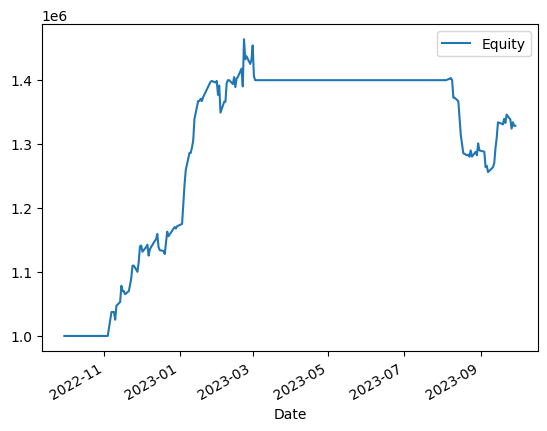

In [46]:
class TradingStrategy(Strategy):
  # Define the two MA lags as *class variables*
  # for later optimization
  n1 = 1
  n2 = 22

  def init(self):
    # Precompute the two moving averages
    self.ema1 = self.I(EMA, self.data.Close, self.n1)
    self.ema2 = self.I(EMA, self.data.Close, self.n2)

  def next(self):
    # If ema1 crosses above ema2, close any existing
    # short trades, and buy the asset
    if crossover(self.ema1, self.ema2):
      if self.data.index[-1].weekday() == 4:
          self.buy()

    elif crossover(self.ema2, self.ema1):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

RunSimulation(TradingStrategy)

## 3.2 MACD

In [257]:
class TradingStrategy(Strategy):

  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)

  def next(self):
    if crossover(self.signal, self.macd):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    elif crossover(self.macd, self.signal):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy)

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  -2.456899            20   97543.101315
1                      MTR  -1.960702            10   98039.297863
2             China Mobile  -3.053555            20   96946.445480
3             CLP Holdings   0.000000             0  100000.000000
4           Hang Seng Bank   0.000000             0  100000.000000
5            Bank of China  -2.341078            10   97658.922233
6  China Construction Bank -12.799357            10   87200.642670
7         Haier Smart Home  -2.848995            20   97151.004902
8                  Meituan   0.481798            20  100481.797974
9       Xiaomi Corporation   5.289839             0  105289.839024
Total Return %: -19.688948540210724


## 3.3 RSI

In [258]:
class TradingStrategy(Strategy):
  overbought = 70
  oversold = 30
  def init(self):
    self.RSI = self.I(RSI, self.data.Close)

  def next(self):
    if crossover(self.RSI, 70):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    elif crossover(30, self.RSI):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy)


                     Stock   Return %  No of Trades   Final Equity
0                     HSBC   3.324745            10  103324.744797
1                      MTR -11.434793            10   88565.206711
2             China Mobile  16.089000            10  116089.000000
3             CLP Holdings   0.000000             0  100000.000000
4           Hang Seng Bank -20.171601            10   79828.398712
5            Bank of China   0.000000             0  100000.000000
6  China Construction Bank   0.000000             0  100000.000000
7         Haier Smart Home  14.911446            10  114911.446270
8                  Meituan  -9.031000            10   90969.000000
9       Xiaomi Corporation   0.000000             0  100000.000000
Total Return %: -6.312203510284425


## 3.4 Bollinger Bands

In [319]:
class TradingStrategy(Strategy):
  def init(self):
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)

  def next(self):
    if crossover(self.data.Close, self.upper_band):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()
å
    elif crossover(self.lower_band, self.data.Close):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy, plot={'CLP Holdings': True})

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  11.347196            10  111347.195942
1                      MTR   0.000000             0  100000.000000
2             China Mobile   0.302995            10  100302.995377
3             CLP Holdings   7.410899            20  107410.898602
4           Hang Seng Bank   5.578195            20  105578.194626
5            Bank of China   0.000000             0  100000.000000
6  China Construction Bank   0.000000             0  100000.000000
7         Haier Smart Home   0.000000             0  100000.000000
8                  Meituan   0.000000             0  100000.000000
9       Xiaomi Corporation   3.168725            10  103168.725372
Total Return %: 27.808009918212893


## 3.5 ADX and Bollinger bands

In [313]:
class TradingStrategy(Strategy):
  def init(self):
    # self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)

  def next(self):
    # Sell condition
    if crossover(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif crossover(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy)

                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  0.000000             0  100000.000000
1                      MTR -2.297093            10   97702.907379
2             China Mobile  0.000000             0  100000.000000
3             CLP Holdings  0.000000             0  100000.000000
4           Hang Seng Bank  0.000000             0  100000.000000
5            Bank of China -5.281645            10   94718.355037
6  China Construction Bank -0.200395            10   99799.604969
7         Haier Smart Home  0.000000             0  100000.000000
8                  Meituan  0.000000             0  100000.000000
9       Xiaomi Corporation  0.000000             0  100000.000000
Total Return %: -7.779132614850999


## 3.7 Aroon and BB

In [170]:
class TradingStrategy(Strategy):
  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)

  def next(self):
    # Sell condition
    if self.AI < 0 and crossover(self.data.Close, self.upper_band):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif self.AI > 0 and crossover(self.lower_band, self.data.Close):
      if self.data.index[-1].weekday() == 4:
        self.buy()

RunSimulation(TradingStrategy)


                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  7.889845            10  107889.844589
1                      MTR  0.000000             0  100000.000000
2             China Mobile -0.833255            10   99166.745377
3             CLP Holdings  0.000000             0  100000.000000
4           Hang Seng Bank  7.666997            10  107666.997147
5            Bank of China  0.000000             0  100000.000000
6  China Construction Bank  0.000000             0  100000.000000
7         Haier Smart Home  0.000000             0  100000.000000
8                  Meituan  0.000000             0  100000.000000
9       Xiaomi Corporation  1.559703            10  101559.702644


## 3.8 Aroon and ADX

In [178]:
class TradingStrategy(Strategy):
  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)

  def next(self):
    # Sell condition
    if crossover(0, self.AI) and isLarger(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif crossover(self.AI, 0) and isLarger(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()

RunSimulation(TradingStrategy)


                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  0.000000             0  100000.000000
1                      MTR  0.000000             0  100000.000000
2             China Mobile -2.239500            10   97760.500000
3             CLP Holdings  0.000000             0  100000.000000
4           Hang Seng Bank  0.000000             0  100000.000000
5            Bank of China  0.000000             0  100000.000000
6  China Construction Bank  2.107714            10  102107.713573
7         Haier Smart Home  0.000000             0  100000.000000
8                  Meituan  0.000000             0  100000.000000
9       Xiaomi Corporation  0.000000             0  100000.000000


## 3.9 ADX and BB

In [186]:
class TradingStrategy(Strategy):
  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)

  def next(self):
    # Sell condition
    if crossover(self.data.Close, self.upper_band) and isLarger(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif crossover(self.lower_band, self.data.Close) and isLarger(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()

RunSimulation(TradingStrategy)


                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  0.000000             0  100000.000000
1                      MTR  0.000000             0  100000.000000
2             China Mobile  0.302995            10  100302.995377
3             CLP Holdings  0.000000             0  100000.000000
4           Hang Seng Bank  0.000000             0  100000.000000
5            Bank of China  0.000000             0  100000.000000
6  China Construction Bank  0.000000             0  100000.000000
7         Haier Smart Home  0.000000             0  100000.000000
8                  Meituan  0.000000             0  100000.000000
9       Xiaomi Corporation  0.000000             0  100000.000000


# 4.0 STRATEGIES

In [312]:
class TradingStrategy(Strategy):
  # Define the two MA lags as *class variables*
  # for later optimization
  n1 = 1
  n2 = 20

  def init(self):
    # Precompute the two moving averages
    # self.macd, self.signal = self.I(MACD, self.data.Close)
    # self.ema1 = self.I(EMA, self.data.Close, self.n1)
    # self.ema2 = self.I(EMA, self.data.Close, self.n2)
    # self.sma1 = self.I(SMA, self.data.Close, self.n1)
    # self.sma2 = self.I(SMA, self.data.Close, self.n2)
    self.RSI = self.I(RSI, self.data.Close)
    # self.ROC = self.I(ROC, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)


  def next(self):
    if crossover(self.middle_band, self.data.Close) and isLarger(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    elif crossover(self.data.Close, self.middle_band) and isLarger(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy)

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC   0.000000             0  100000.000000
1                      MTR -15.405500            10   84594.500000
2             China Mobile  22.395449            10  122395.448521
3             CLP Holdings   0.000000             0  100000.000000
4           Hang Seng Bank   3.121097             0  103121.096771
5            Bank of China  -5.944044            10   94055.955669
6  China Construction Bank   0.000000             0  100000.000000
7         Haier Smart Home  21.654103            20  121654.102972
8                  Meituan   0.000000             0  100000.000000
9       Xiaomi Corporation   0.000000             0  100000.000000
Total Return %: 25.821103932619092
